In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
files.upload()


Saving corona.txt to corona.txt


{'corona.txt': b'20,N\r\n25,Y\r\n60,Y\r\n30,N\r\n21,N\r\n45,Y\r\n62,Y\r\n55,Y\r\n78,N\r\n34,N\r\n22,N\r\n18,N \r\n16,N'}

In [3]:
!ls

corona.txt  sample_data


In [6]:
df=pd.read_csv('corona.txt',names=["age","IsPositive"])
print(df)

    age IsPositive
0    20          N
1    25          Y
2    60          Y
3    30          N
4    21          N
5    45          Y
6    62          Y
7    55          Y
8    78          N
9    34          N
10   22          N
11   18         N 
12   16          N


In [7]:
df.describe()

,age
count,13.000000
mean,37.384615
std,20.402363
min,16.000000
25%,21.000000
50%,30.000000
75%,55.000000
max,78.000000


In [ ]:
sns.pairplot(df, hue='IsPositive',size=3)

In [14]:
df['IsPositive'].value_counts()

N     7
Y     5
N     1
Name: IsPositive, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3582c2b390>]],
      dtype=object)

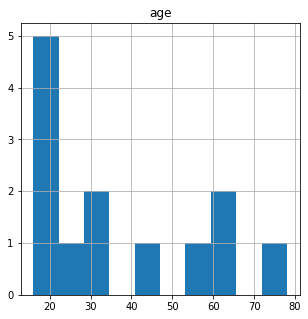

In [16]:
df.hist(column='age',figsize=(5,5))

In [ ]:
in_df = df.drop(df.columns[1],axis=1)
out_df = df.drop(df.columns[0],axis=1)
in_df.info()
out_df.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(in_df, out_df, test_size=0.2, random_state=42)
print(X_train)
print(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression()
cfr = clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
pred = clf.predict(X_test)

In [43]:
print(pred)

['N' 'N' 'N']


In [44]:
print ('Accuracy of sk-learn: {0}'.format(clf.score(X_test, y_test)))

Accuracy of sk-learn: 0.6666666666666666


In [45]:
print(clf.predict([[25]]))

['N']


In [39]:
print(clf.coef_)


[[0.0424634]]


In [46]:
from sklearn.metrics import plot_confusion_matrix

[[2 0]
 [1 0]]


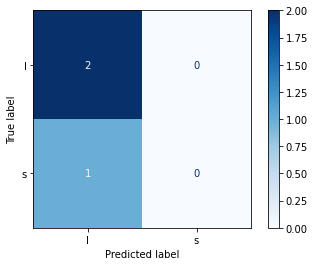

In [48]:
disp = plot_confusion_matrix(cfr, X_test, y_test,
                                 display_labels='IsPositive',
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)

In [49]:
from sklearn import svm

In [53]:
svm_cfr = svm.SVC(kernel='linear', C=0.01)
svm_cfr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[2 0]
 [1 0]]


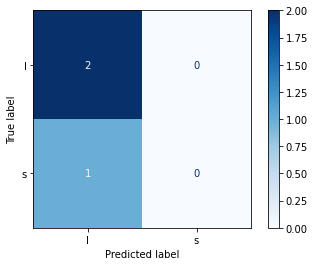

In [54]:
svm_disp = plot_confusion_matrix(svm_cfr, X_test, y_test,
                                 display_labels='IsPositive',
                                 cmap=plt.cm.Blues 
                                 )

print(svm_disp.confusion_matrix)

In [55]:
svm_cfr.predict([[25]])

array(['N'], dtype=object)

In [57]:
svm_cfr.score(X_test, y_test)

0.6666666666666666